In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [78]:
AQS = pd.read_csv('LA_AQS_2023.csv')
AQS = AQS.rename(columns = {'Parameter Name':'parameter', 'Arithmetic Mean':'mean', 'Date (Local)':'date', 'Duration Description':'duration'})
Oz_AQS = AQS.query('parameter == "Ozone" and duration == "1 HOUR"')

In [79]:
Oz_AQS.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,parameter,duration,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
20,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
64,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
204,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
228,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
271,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


[Text(0.5, 0, 'Ozone (ppm)'), Text(0, 0.5, 'Count')]

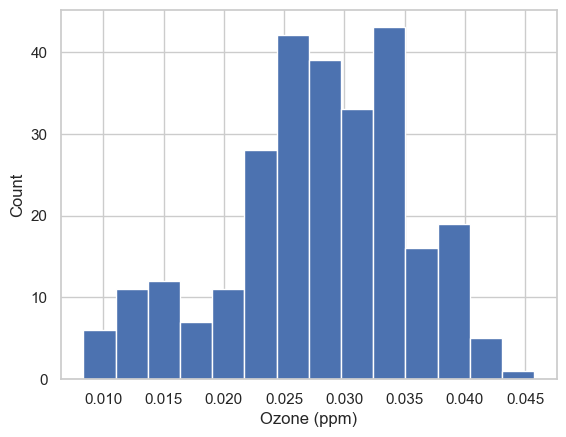

In [104]:
#i- histogram of O3 concentrations
sns.set_theme(style = 'whitegrid', font_scale=1) 
o_hist = sns.histplot(data=Oz_AQS, x="mean", alpha = 1) #only data to plot is y- plots along x-axis
o_hist.set(xlabel='Ozone (ppm)', ylabel='Count')

The distribution of ozone concentrations is relatively normal, with a slight skew towards higher concentrations. 

In [85]:
N_AQS = AQS.query('parameter == "Nitrogen dioxide (NO2)" and duration == "1 HOUR" ')
N_AQS.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,parameter,duration,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
19,6,37,1103,42602,1,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,17,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
29,6,37,1103,42602,1,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,17,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
41,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
44,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,20,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


[Text(0.5, 0, 'Nitrogen Dioxide (ppb)'), Text(0, 0.5, 'Density')]

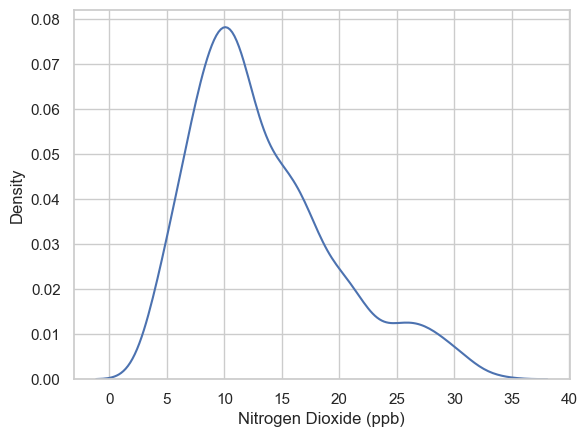

In [100]:
#ii- density plot of NO2 concentrations
n_den = sns.kdeplot(data=N_AQS, x="mean") #kernel density- probability ; area under a density function =1
n_den.set(xlabel='Nitrogen Dioxide (ppb)', ylabel='Density')

The above NO2 density plot shows a fairly skewed distribution, with the highest probabilities around 10 ppb.

In [71]:
#scatterplot of ozone vs NO2
Oz_mean = Oz_AQS["mean"]
Oz_date = Oz_AQS["date"]
N_mean = N_AQS["mean"]
N_date = N_AQS["date"]

In [72]:
oz = pd.DataFrame(data = {"Oz_mean":Oz_mean, 'date':Oz_date})
n = pd.DataFrame(data = {"N_mean":N_mean, 'date':N_date})

In [73]:
n

,N_mean,date
1,4.816667,2023-01-01
19,4.550000,2023-01-01
29,4.550000,2023-01-01
41,4.816667,2023-01-01
44,14.720833,2023-01-02
...,...,...
21264,8.614286,2023-09-29
21297,6.370833,2023-09-30
21298,6.370833,2023-09-30
21307,7.362500,2023-09-30


In [74]:
oz_n = oz.merge(n, on=['date'])

[Text(0.5, 0, 'Nitrogen Dioxide (ppb)'), Text(0, 0.5, 'Ozone (ppm)')]

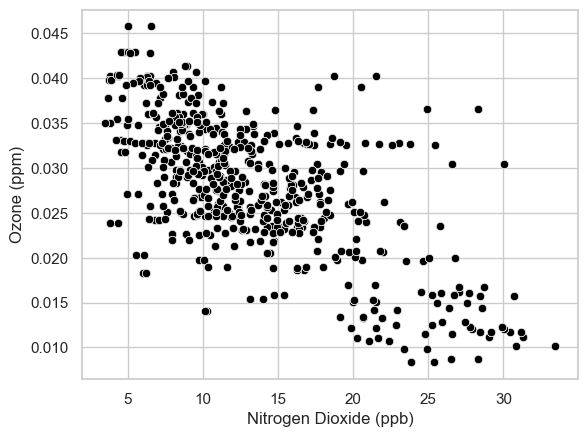

In [101]:
on_s = sns.scatterplot(data=oz_n, x="N_mean", y="Oz_mean", color='black')
on_s.set(xlabel='Nitrogen Dioxide (ppb)', ylabel='Ozone (ppm)')

Ozone and NO2 in the atmosphere appear to be largely negatively correlated. The points are densest around 0.03 ppm ozone and 10 ppb NO2, which is expected based on the previous two plots.

In [80]:
#barchart of number of days per month with O3 > 35 ppb
Oz35_AQS = Oz_AQS.query('mean > 0.035')

In [81]:
Oz35_AQS.to_csv('Oz35.csv', index=False) 

In [82]:
#counted number of days in each month with ozone >35 ppb, saved that as a different csv file 'Oz_month'
Oz_month = pd.read_csv('Oz_month.csv')

In [83]:
Oz_month

,month,occurences
0,Feb,2
1,Mar,5
2,Apr,11
3,May,8
4,Jun,3
5,Jul,3
6,Aug,1
7,Sep,10


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Number of Occurences')]

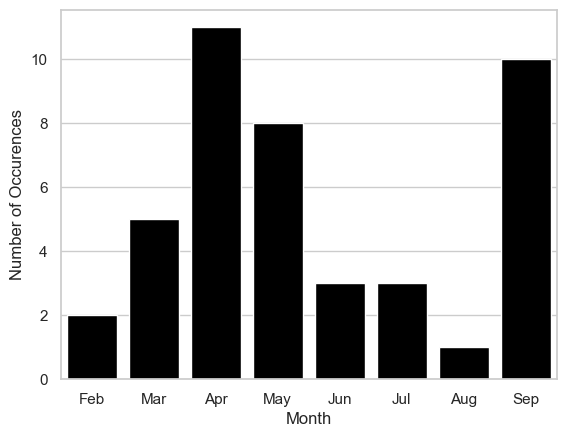

In [105]:
oz_high = sns.barplot(data = Oz_month, x="month", y="occurences", color = 'black')
oz_high.set(xlabel='Month', ylabel='Number of Occurences')

The month wih the highest number of days when ozone is >35 ppb is April (11 days), with September close behind (10 days). August and February have the lowest number of occurences, 1 and 2 respectively.

In [56]:
#Mauna Loa Data
#i- scatterplot of average CO2 concentrations vs time (decimal date)
ml = pd.read_csv('MaunaLoa_CO2.csv')
ml.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


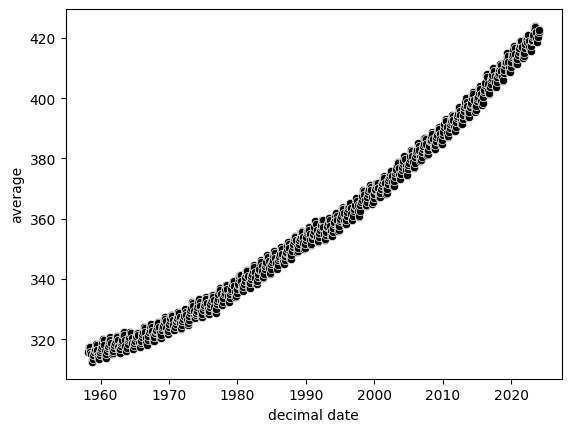

In [58]:
ml_scat = sns.scatterplot(data=ml, x="decimal date", y="average", color='black')

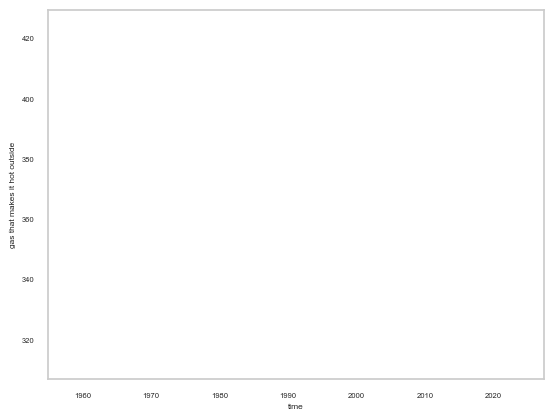

In [102]:
sns.set_theme(style = 'whitegrid', font_scale=0.5) 
ml_bad = sns.scatterplot(data=ml, x="decimal date", y="average", color = 'white')
ml_bad.set_xlabel('time')
ml_bad.set_ylabel('gas that makes it hot outside')
ml_bad.grid(False)
#hPlot.set_title('')